In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Please change the path to your path

In [2]:
# Read the daily confirmed data
covid_confirmed = pd.read_csv('/Users/charlotte/Desktop/study/AC209/project/Covid-19-Prediction/data/covid_confirmed_usafacts_new.csv')
# Read the population data
popu =  pd.read_csv('/Users/charlotte/Desktop/study/AC209/project/Covid-19-Prediction/data/covid_county_population_usafacts.csv')

# Read the fips we use for this project 
fips = pd.read_csv('fips.csv')['fip'].to_list()

# Read the cleaned social-economics data,  
# Ref: https://github.com/Temi-tech/Covid_Social_Determinants/blob/main/main_all_counties.csv
main_all_counties = pd.read_csv('Covid_Social_Determinants-main/main_all_counties.csv')

In [3]:
main_all_counties.head()

,FIPS,state,county_name,NCHS_urbanization,total_population,num_beds,confirmed,deaths,beds_per_1000,confirmed_per_1000,...,confirmed_quartile,deaths_quartile,2018_rank_in_state_per_capita_income,2016_per_capita_income,2017_per_capita_income,2017_per_capita_income_percent_change,2018_per_capita_income_percent_change,rank_in_state_2018_per_capita_income_percent_change,confirmed_per_100000,deaths_per_100000
0,2020,Alaska,Anchorage,Medium metro,296112,753.0,3297,25,2.542957,11.134301,...,1,1,10,62172,63173,1.6,5.3,12,1113.43,8.44
1,2100,Alaska,Haines,Non-core,2518,57.0,4,0,22.637014,1.588562,...,0,0,9,57423,62478,8.8,7.3,3,158.86,0.00
2,2122,Alaska,Kenai Peninsula,Non-core,58220,109.0,422,2,1.872209,7.248368,...,1,0,21,49544,49697,0.3,4.7,15,724.84,3.44
3,2090,Alaska,Fairbanks North Star,Small metro,99653,212.0,755,9,2.127382,7.576290,...,1,1,19,52803,53974,2.2,4.9,14,757.63,9.03
4,2170,Alaska,Matanuska-Susitna,Medium metro,103464,109.0,511,2,1.053507,4.938916,...,0,0,26,44520,44043,-1.1,4.2,18,493.89,1.93


In [4]:
# Get the confirmed cases average in Sept.
covid_confirmed['Septmean']=covid_confirmed.iloc[:,-70:-40].mean(axis=1)

In [5]:
# Select the fip and Sept mean column
sel_covid = covid_confirmed[['countyFIPS','Septmean']]

# merge the data with population
covid_pop = pd.merge(popu,sel_covid,on=['countyFIPS'])

# Select the data in fips
covid_pop = covid_pop[covid_pop['countyFIPS'].isin(fips)]

# Reset the index
covid_pop.reset_index(drop=True,inplace=True)
# Compute confirmed cases per 1k
covid_pop['per1k'] = covid_pop['Septmean']/covid_pop['population']*1000

In [6]:
covid_pop.head()

,countyFIPS,County Name,State,population,Septmean,per1k
0,1001,Autauga County,AL,55869,1618.433333,28.968361
1,1003,Baldwin County,AL,223234,5020.900000,22.491646
2,1005,Barbour County,AL,24686,817.766667,33.126739
3,1007,Bibb County,AL,22394,613.233333,27.383823
4,1009,Blount County,AL,57826,1485.166667,25.683372


In [7]:
# Rename the column to make it consistent with main_all_counties(social-economics features)
covid_pop = covid_pop.rename({'countyFIPS': 'FIPS'}, axis='columns')

# Merge confirmed cases per 1k and social-economics features
feature_pop = pd.merge(covid_pop,main_all_counties,on='FIPS')

In [8]:
# Select the insterested features for analysis

features = feature_pop[['per1k',
                         'beds_per_1000',
                         'over_65_percent',
                         'med_income',
                         'per_capita_income',                       
                         'no_diploma_percent',
                         'no_insurance_percent',
                         'unemployed_percent',
                         'poverty_percent',]]



In [9]:
# Rename the columns to make it more interpretable
features.columns = [[
                         'Confirmed Cases/1k',  
                         'Hospital Beds Percentage/1k',
                         'Age Over 65 Percentage',
                         'Median Household Income',
                         'Per Capita Income',                        
                         'No Diploma Percentage',
                         'No Insurance Percentage',
                         'Unemployed Percentage',
                         'Poverty Percentage']]

[Text(0.5, 0, 'Confirmed Cases/1k'),
 Text(1.5, 0, 'Hospital Beds Percentage/1k'),
 Text(2.5, 0, 'Age Over 65 Percentage'),
 Text(3.5, 0, 'Median Household Income'),
 Text(4.5, 0, 'Per Capita Income'),
 Text(5.5, 0, 'No Diploma Percentage'),
 Text(6.5, 0, 'No Insurance Percentage'),
 Text(7.5, 0, 'Unemployed Percentage'),
 Text(8.5, 0, 'Poverty Percentage')]

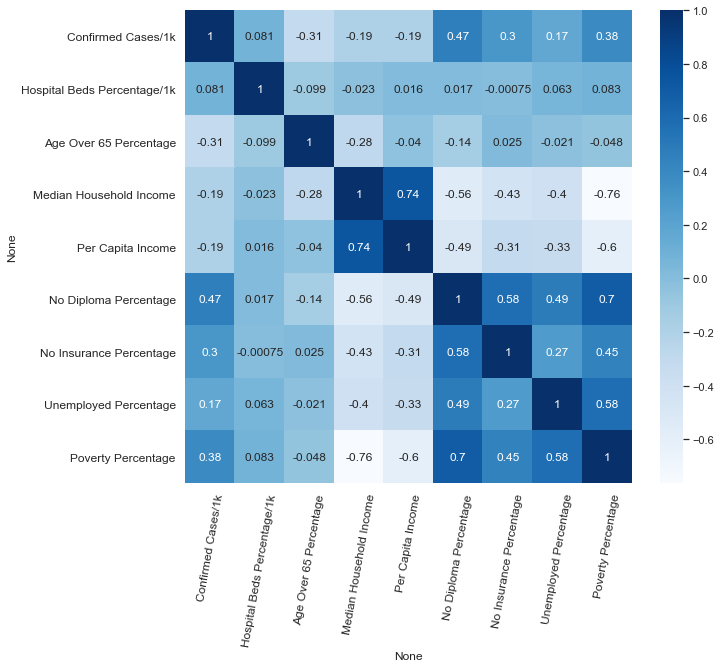

In [10]:
# Display the correlation matrrix
sns.set(font_scale=6)
features_corr =features.corr() 
sns.set(rc={'figure.figsize':(10,8.7)})
g = sns.heatmap(features_corr, annot=True,cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
g.set_xticklabels(g.get_xticklabels(), rotation = 80, fontsize = 12)

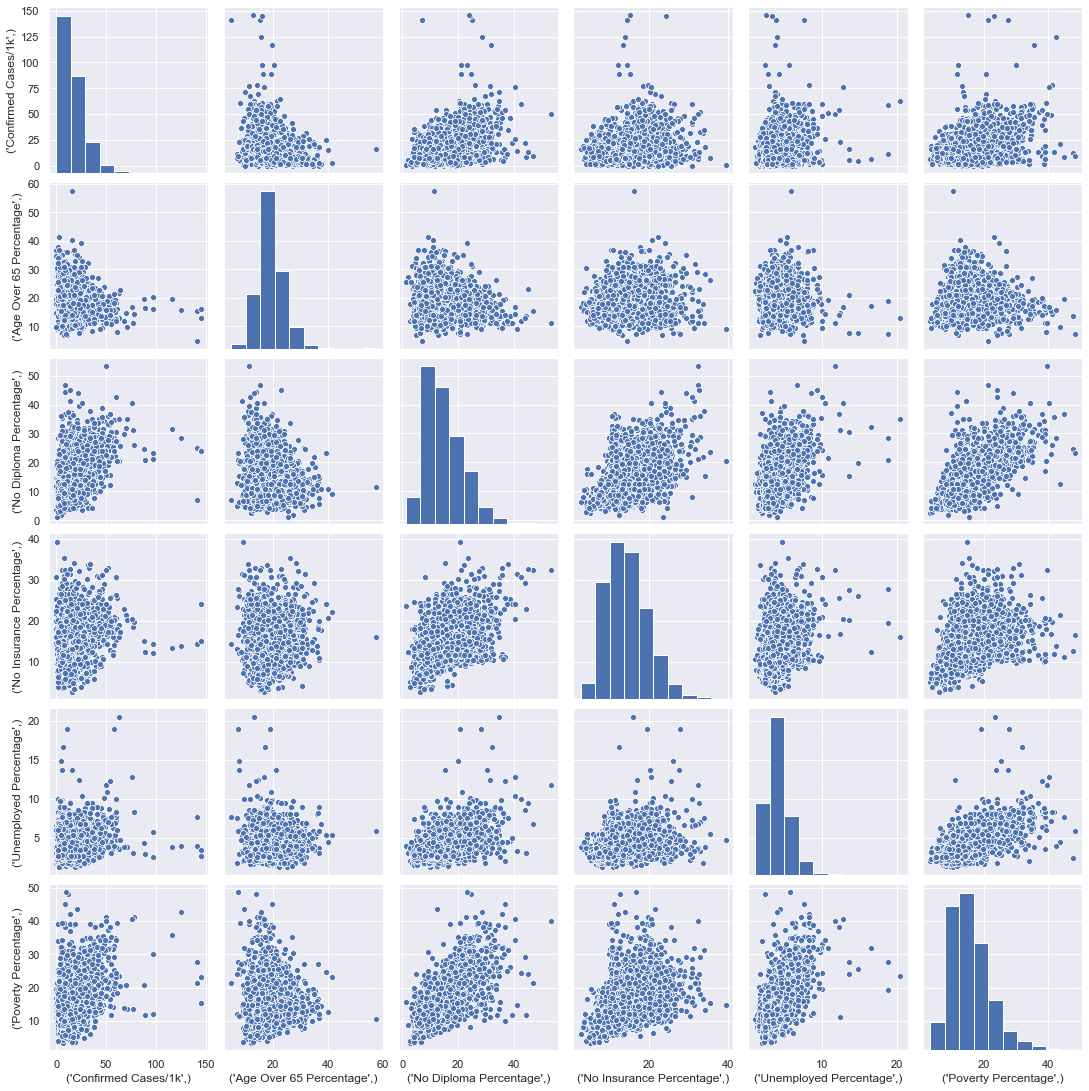

In [11]:
# pair plot the selected 5 features and the confirmed cases
sns.pairplot(
    features[[
                         'Confirmed Cases/1k',  
                         'Age Over 65 Percentage',                     
                         'No Diploma Percentage',
                         'No Insurance Percentage',
                         'Unemployed Percentage',
                         'Poverty Percentage']]
            )